 # Лабораторная работа №2 
 ## Вариант 19

$
y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
![](./find-a-b.png)

In [75]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from math import floor

max_n = 1000
a = -2
b = 4

## Теоретическая плотность распределения
![](./analytical.jpg)
*Опечатка, F(y)*
![](./analytical1.jpg)

In [76]:
def func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

borderA = func(a)
borderB = func(b)

def analytical_func_densiny(y):    
    if y >= borderA and y <= borderB:
        return (1 / 2) * (y ** 2)
    return 0

def add_analytical_func_to_plot():
    x_axis = np.linspace(func(a), func(b), 1000)
    y_axis = [analytical_func_densiny(i) for i in x_axis]
    plt.step(x_axis, y_axis, label="analytical function densiny")
    plt.legend()

## Построение вариационного ряда

In [77]:
def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Равноинтервальный метод 

In [156]:
COUNT_INTEVAL = 20

def equal_range_method(y_sample):
    MIN = y_sample[0]
    MAX = y_sample[len(y_sample) - 1]
    count = len(y_sample)
    interval = (MAX - MIN) / COUNT_INTEVAL
    current = MIN
    result = []
    while current <= MAX:
        left = current
        right = min(MAX, current + interval)
        in_current_interval = 0
        for i in y_sample:
            if i > right:
                break
            if left <= i and i <= right:
                in_current_interval += 1
        result.append((left, right, in_current_interval / (count * interval)))
        current += interval
    return result


## Построение гистограммы равноинтервальным методом

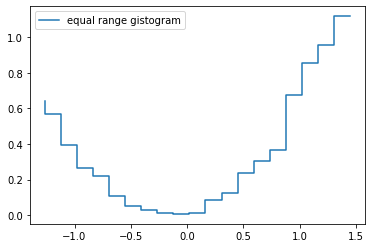

In [157]:
def add_equal_range_method_to_plot(values):
    x_axis = [i[0] for i in values]
    y_axis = [i[2] for i in values]
    plt.step(x_axis, y_axis, label="equal range gistogram")
    plt.legend()

equal_range_values = equal_range_method(y_sample)
add_equal_range_method_to_plot(equal_range_values)
plt.show()



## Равновероятностный метод

In [160]:
def equal_chance_method(y_sample):
    count = len(y_sample)
    take_points = count / COUNT_INTEVAL
    interval_count = count / COUNT_INTEVAL
    representative_eps = 4
    current = 0
    result = []

    while True:
        left = current
        right = round(take_points)

        if right >= len(y_sample):
            right = len(y_sample) - 1

        if abs(right - left + 1 - interval_count) <= representative_eps:
            result.append((y_sample[left], y_sample[right], (right - left + 1) / (count * (y_sample[right] - y_sample[left]))))

        if right == count - 1:
            break

        current = right + 1
        
        take_points += interval_count

    return result


## Построение гистограммы равновероятностным методом

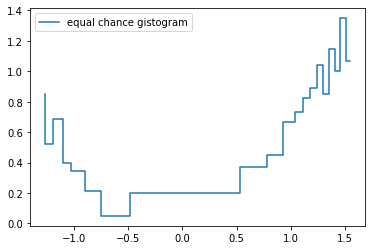

In [161]:
def add_equal_chance_method_to_plot(values):
    x_axis = [i[0] for i in values]
    y_axis = [i[2] for i in values]
    plt.step(x_axis, y_axis, label="equal chance gistogram")
    plt.legend()

equal_chance_values = equal_chance_method(y_sample)
add_equal_chance_method_to_plot(equal_chance_values)
plt.show()

## Сравнение

In [ ]:
add_analytical_func_to_plot()
equal_chance_values = equal_chance_method(y_sample)
add_equal_chance_method_to_plot(equal_chance_values)